In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-03-07 14:39:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.207, 173.194.194.207, 173.194.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  94.1MB/s    in 0.7s    

2024-03-07 14:39:55 (94.1 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

local_zip = "./cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile( local_zip, "r")
zip_ref.extractall()

zip_ref.close()

In [3]:
import os

base_dir = "cats_and_dogs_filtered"

print( f"Contents of base directory: { os.listdir( base_dir)}")

print( f"Contents of train directory: { os.listdir( f'{ base_dir}/train')}")
print( f"Contents of validation directory: { os.listdir( f'{ base_dir}/validation')}")

Contents of base directory: ['vectorize.py', 'validation', 'train']
Contents of train directory: ['dogs', 'cats']
Contents of validation directory: ['dogs', 'cats']


In [4]:
train_dir = os.path.join( base_dir, "train")
validation_dir = os.path.join( base_dir, "validation")

train_cats_dir = os.path.join( train_dir, "cats")
train_dogs_dir = os.path.join( train_dir, "dogs")

validation_cats_dir = os.path.join( validation_dir, "cats")
validation_dogs_dir = os.path.join( validation_dir, "dogs")

In [5]:
train_cats_fnames = os.listdir( train_cats_dir)
train_dogs_fnames = os.listdir( train_dogs_dir)

print( train_cats_fnames[ :10])
print( train_dogs_fnames[ :10])

['cat.238.jpg', 'cat.834.jpg', 'cat.92.jpg', 'cat.84.jpg', 'cat.395.jpg', 'cat.1.jpg', 'cat.672.jpg', 'cat.58.jpg', 'cat.29.jpg', 'cat.56.jpg']
['dog.298.jpg', 'dog.960.jpg', 'dog.701.jpg', 'dog.954.jpg', 'dog.396.jpg', 'dog.212.jpg', 'dog.63.jpg', 'dog.944.jpg', 'dog.545.jpg', 'dog.769.jpg']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

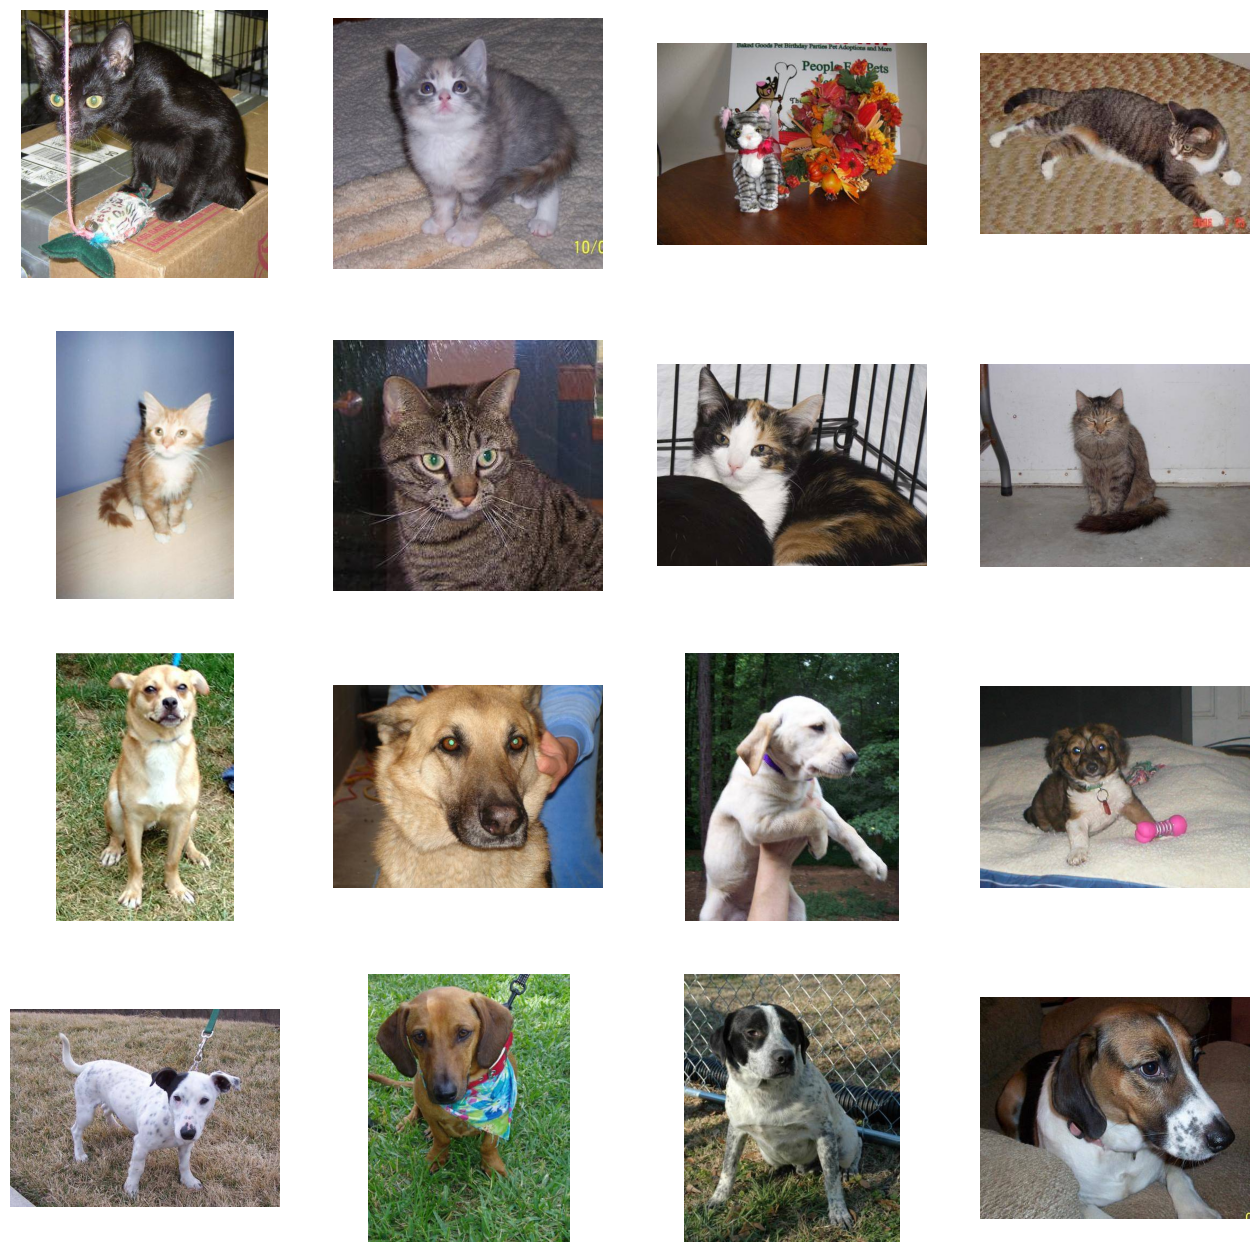

In [7]:
fig = plt.gcf()
fig.set_size_inches( ncols * 4, nrows * 4)

pic_index += 8

next_cat_pix = [ os.path.join( train_cats_dir, fname) for fname in train_cats_fnames[ pic_index - 8: pic_index]]
next_dog_pix = [ os.path.join( train_dogs_dir, fname) for fname in train_dogs_fnames[ pic_index - 8: pic_index]]

for i, img_path in enumerate( next_cat_pix + next_dog_pix):
    sp = plt.subplot( nrows, ncols, i + 1)
    sp.axis( "off")

    img = mpimg.imread( img_path)

    plt.imshow( img)

plt.show()

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential( [
    tf.keras.layers.Conv2D( 16, ( 3, 3), activation="relu", input_shape=( 150, 150, 3)),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 32, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 64, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense( 512, activation="relu"),
    tf.keras.layers.Dense( 1, activation="sigmoid")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop( learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=[ "accuracy"]
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator( rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode="binary",
    target_size=( 150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode="binary",
    target_size=( 150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    verbose=2
)

Epoch 1/25
100/100 - 16s - loss: 0.6120 - accuracy: 0.6745 - val_loss: 0.5525 - val_accuracy: 0.7050 - 16s/epoch - 159ms/step
Epoch 2/25
100/100 - 15s - loss: 0.5954 - accuracy: 0.6850 - val_loss: 0.5510 - val_accuracy: 0.7080 - 15s/epoch - 147ms/step
Epoch 3/25
100/100 - 14s - loss: 0.5962 - accuracy: 0.6905 - val_loss: 0.5494 - val_accuracy: 0.7180 - 14s/epoch - 141ms/step
Epoch 4/25
100/100 - 15s - loss: 0.5797 - accuracy: 0.7015 - val_loss: 0.5612 - val_accuracy: 0.6920 - 15s/epoch - 153ms/step
Epoch 5/25
100/100 - 14s - loss: 0.5794 - accuracy: 0.6935 - val_loss: 0.7019 - val_accuracy: 0.6500 - 14s/epoch - 142ms/step
Epoch 6/25
100/100 - 14s - loss: 0.5684 - accuracy: 0.7100 - val_loss: 0.5260 - val_accuracy: 0.7320 - 14s/epoch - 141ms/step
Epoch 7/25
100/100 - 14s - loss: 0.5579 - accuracy: 0.7120 - val_loss: 0.5590 - val_accuracy: 0.7120 - 14s/epoch - 142ms/step
Epoch 8/25
100/100 - 14s - loss: 0.5574 - accuracy: 0.7265 - val_loss: 0.5276 - val_accuracy: 0.7490 - 14s/epoch - 140

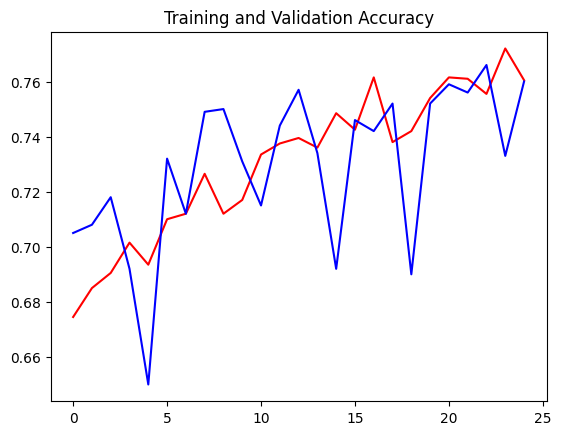

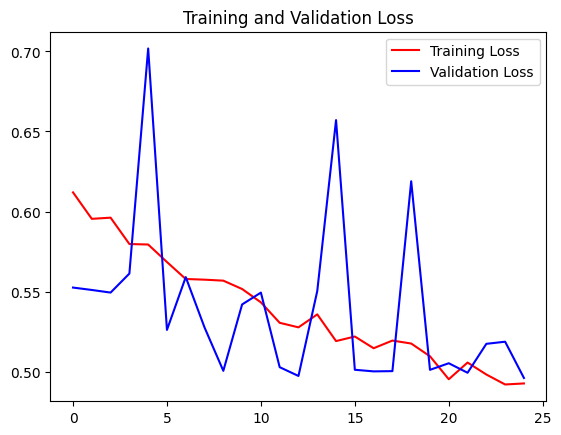

In [15]:
acc = history.history[ "accuracy"]
val_acc = history.history[ "val_accuracy"]
loss = history.history[ "loss"]
val_loss = history.history[ "val_loss"]

epochs = range( len( acc))

plt.plot( epochs, acc, "r", label="Training accuracy")
plt.plot( epochs, val_acc, "b", label="Validation accuracy")
plt.title( "Training and Validation Accuracy")
plt.figure()

plt.plot( epochs, loss, "r", label="Training Loss")
plt.plot( epochs, val_loss, "b", label="Validation Loss")
plt.title( "Training and Validation Loss")
plt.legend()

plt.show()